# Aula 10 - métodos de ensemble

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Métodos de ensemble
- 2) Bagging & Random Forest
- 3) Boosting & AdaBoost
- 4) Gradient Boosting
- 5) XGBoost

_________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

____
____
____

## 1) Métodos de Ensemble


Há uma classe de algoritmos de Machine Learning, os chamados **métodos de ensemble** que tem como objetivo **combinar as predições de diversos estimadores mais simples** para gerar uma **predição final mais robusta**

Os métodos de ensemble costuman ser divididos em duas classes:

- **Métodos de média**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir **variância**, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**
<br>

- **Métodos de boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o **viés** do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Há, ainda, uma terceira classe de método de ensemble, o chamado [stacking ensemble](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/), que consiste em "empilhar" modelos de modo a produzir a mistura. Não veremos esta modalidade em detalhes, mas deixo como sugestão para estudos posteriores! :)

Para mais detalhes sobre métodos de ensemble no contexto do sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

Na aula de hoje, vamos conhecer em detalhes os procedimentos de bagging e boosting, ilustrados pelos métodos Random Forest e AdaBoost, respectivamente. Vamos lá!

_________
_______
_________

## 2) Bagging & Random Forest

Uma técnica muito interessante (e muito performática!) baseada em árvores é o **Random Forest**.

Neste método, são criadas varias **árvores diferentes e independentes entre si**, através de um processo **aleatório**, e a predição final é tomada através da média das predições individuais!

<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width=700>

O Random Forest utiliza os conceitos de **bootstrapping** e **aggregation** (ou então, o procedimento composto **bagging**) para criar um modelo composto que é melhor que uma única árvore!

<img src="https://c.mql5.com/2/33/image1__1.png" width=600>

Vamos entrender um pouco melhor cada componente do método!

### Bootstrapping

O procedimento de **bootstrapping** é utilizado no contexto do random forest para gerar os chamados **bootstrapped datasets**.

A ideia é bem simples! Para a criação de cada bootstrapped dataset, primeiro:

> Selecionamos **aleatoriamente com reposição** algumas linhas da base original. Isso gera um novo dataset (reamostrado), chamado de **bootstrapped dataset**. O número de linhas do dataset reamostrado é controlável.

Logo após, fazemos uma árvore de decisão **treinada neste dataset reamostrado**. Mas, com um detalhe:

> Usamos apenas um **subconjunto aleatório das features** em cada avaliação de quebras (isso equivale ao `splitter="random"`). A quantidade de features a serem consideradas é controlável.

Com isso, muitas árvores são geradas (a quantidade também é controlável), cada uma seguindo o procedimento de bootstrap!

Note que o o procedimento de bootstrapping introduz **duas fontes de aleatoriedade**, cujo objetivo é **diminuir a variância** (tendência a overfitting) do modelo.

De fato, árvores individuais são facilmente overfitadas, como discutimos em aula (lembre-se da grande flexibilidade da hipótese em encontrar condições favoráveis à aprendizagem dos ruídos!).

Com esta aleatorização introduzida pelo bootstrapping, o objetivo é que as árvores construídas sejam **independentes**, de modo que **os erros cometidos por cada uma sejam independentes**. 

Deste modo, se considerarmos as previsões isoladas e de alguma forma **agregar** as previsões, a expectativa é que o modelo final seja **menos propenso a overfitting**! Mas, uma pergunta natural é: o que é essa "agragação"? Aqui entra o segundo elemento do bagging...

### Aggregation

Entendemos como o bootstrap é utilizado para gerar várias árvores independentes. 

Então, quando temos uma nova observação para atribuir o target, passamos as features **por cada uma das árvores**, e, naturalmente, cada árvore produz **o seu target**, que pode muito bem não ser o mesmo!

A **agregação** é utilizada para tomar a decisão final:

> No caso de classificação, a classe final é atribuída como **a classe majoritária**, isso é, **a classe que foi o output $\hat{y}$ mais vezes dentre todas as árvores**;

> No caso de regressão, o valor final é atribuído como **a média dos valores preditos $\hat{y}$ por cada árvore**.

Note que em ambos os casos, o procedimento de agregação pode ser visto como uma **média**, e o sklearn deixa isso explícito: "*In contrast to the original publication, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.*"

Tomando a média como procedimento de agregação, a expectativa é que **alguns erros sejam anulados**, garantindo uma previsão final **mais estável e mais generalizável**, dado que os ruídos são eliminados.

Juntando o bootstrapping com o aggregation, temos então o...

### Bagging

> Bagging: **b**ootstrap **agg**regat**ing**

Esquematicamente:

<img src=https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png width=500>

As classes do random forest são:

- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

Ambos os métodos têm hiperparâmetros similares aos hiperparâmetros das árvores convencionais, aplicados a cada uma das árvores independentes.

Além destes, há dois hiperparâmetros bem importantes, referentes ao método de ensemble em si:

- `n_estimators` : controla quantas árvores independentes serão construídas (i.e., o número de árvores na floresta). Em geral, quanto mais árvores melhor (mas mais tempo vai demorar). Além disso, depois de uma determinade quantidade de árvores, os resultados vão parar de melhorar, pois há um limite para o bootstrap: depois de uma certa quantidade, as árvores deixam de ser tão independentes assim...
<br>

- `max_features`: o número de features no subconjunto aleatório de candidata a serem utilizadas em cada quebra. Quanto menor for o valor, mais conseguimos reduzir o overfitting, mas o underfitting é favorecido. Uma boa heurística é `max_features=None` para regressão e `max_features="sqrt"`para classificação, embora estratégias diferentes podem (e devem) ser testadas com o CV.


___

Para uma explicação bem visual sobre o funcionamento deste método, sugiro os vídeos do canal [StatQuest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ). 

Obs.: toda a [playlist de machine learning](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF) é muitíssimo interessante, com vídeos super claros e ilustrativos! Além disso, há outros vídeos de estatística que são muito bons! Este é um dos melhores canais no youtube para se aprender de forma clara e descontraída sobre estatística e machine learning!

_____________

Agora, vamos ver o Random Forest em ação!

Modelo baseline de Random Forest (dropando NaNs e features categóricas):

In [2]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

X = df.drop(columns="Risk")
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==========================================================

pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================

pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                              ("onehot", OneHotEncoder())])

features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

# ==========================================================

pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat", pipe_features_cat, features_cat)])

# pipeline final
pipe_rf = Pipeline([("pre_processador", pre_processador),
                    ("rf", RandomForestClassifier(random_state=42))])


pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                        

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


Métricas de avaliação de treino:
[[240   0]
 [  0 560]]


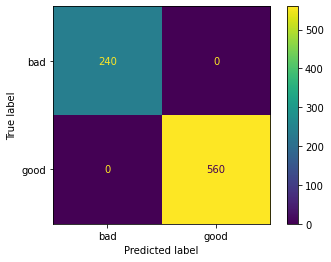

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       240
        good       1.00      1.00      1.00       560

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Métricas de avaliação de teste:
[[ 28  32]
 [ 18 122]]


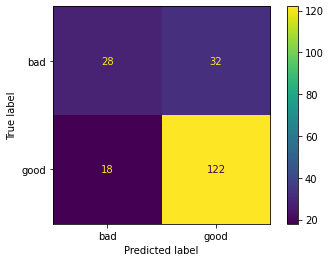

              precision    recall  f1-score   support

         bad       0.61      0.47      0.53        60
        good       0.79      0.87      0.83       140

    accuracy                           0.75       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200



In [6]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

Apesar da boa performance no teste, é evidente que nosso modelo ainda está overfitado!

Isso é algo muito interessante do random forest: apesar de ser possível overfitá-lo, **a variância do erro de generalização vai a zero, conforme mais árvores são adicionadas**:

<img src=https://i.stack.imgur.com/8GU8U.png width=500>

Ou seja, um modelo de random forest **tende a ser mais estável** no que diz respeito à generalização!

Para evitar o overfitting em si, podemos usar as mesmas técnicas de regularização das árvores individuais, e aumentar o número de árvores na floresta:

In [18]:
def pipe_pre_process_german():
    
    df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

    X = df.drop(columns="Risk")
    y = df["Risk"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                  ("onehot", OneHotEncoder())])

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return pre_processador

In [21]:
def metricas_classificacao(estimator):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    

In [19]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_rf = Pipeline([("pre_processador", pre_processador),
                    # agora temos árvores regularizadas com max_depth=5
                     ("rf", RandomForestClassifier(n_estimators=5000,
                                                   max_depth=5,
                                                   random_state=42,
                                                   n_jobs=-1))])


pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                        


Métricas de avaliação de treino:
[[ 83 157]
 [  8 552]]


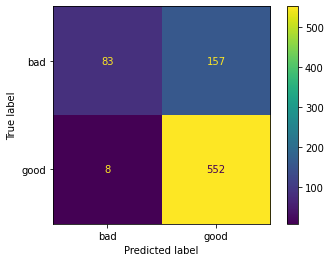

              precision    recall  f1-score   support

         bad       0.91      0.35      0.50       240
        good       0.78      0.99      0.87       560

    accuracy                           0.79       800
   macro avg       0.85      0.67      0.69       800
weighted avg       0.82      0.79      0.76       800


Métricas de avaliação de teste:
[[ 15  45]
 [  7 133]]


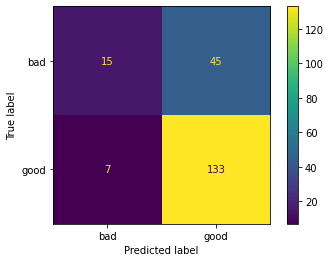

              precision    recall  f1-score   support

         bad       0.68      0.25      0.37        60
        good       0.75      0.95      0.84       140

    accuracy                           0.74       200
   macro avg       0.71      0.60      0.60       200
weighted avg       0.73      0.74      0.70       200



In [22]:
metricas_classificacao(pipe_rf)

> **DICA**: o random forest é altamente paralelizável! (afinal, as árvores são independentes).
> Por este motivo, vale a pena utilizar o argumento `n_jobs`, para paralelizar e acelerar os cálculos!

Será que dá pra melhorar?? Podemos construir uma pipeline e fazer o grid/random search para buscar o melhor modelo!

In [12]:
# façam o gird/random search, pipeline completa...
# obs: cuidado com o parâmetro n_estimators! se a grade incluir muitas árvores, vai demorar!

_________
_______
_________

## 3) Boosting & AdaBoost

O AdaBoost significa **Adaptive Boosting**, e tem como procedimento geral **a criação sucessiva dos chamados weak learners**, que são modelos bem fracos de aprendizagem - geralmente, **árvores de um único nó (stumps)**.

<img src="https://miro.medium.com/max/1744/1*nJ5VrsiS1yaOR77d4h8gyw.png" width=300>

O AdaBoost utiliza os **erros da árvore anterior para melhorar a próxima árvore**. As predições finais são feitas com base **nos pesos de cada stump**, cuja determinação faz parte do algoritmo!

<img src="https://static.packt-cdn.com/products/9781788295758/graphics/image_04_046-1.png" width=700>

Vamos entender um pouco melhor...

Aqui, o bootstrapping não é utilizado: o método começa treinando um classificador fraco **no dataset original**, e depois treina diversas cópias adicionais do classificador **no mesmo dataset**, mas dando **um peso maior às observações que foram classificadas erroneamente** (ou, no caso de regressões, a observações **com o maior erro**).

Assim, após diversas iterações, classificadores/regressores vão sequencialmente "focando nos casos mais difíceis", e construindo um classificador encadeado que seja forte, apesar de utilizar diversos classificadores fracos em como elementos fundamentais.

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width=500>


De forma resumida, as principais ideias por trás deste algoritmo são:

- O algoritmo cria e combina um conjunto de **modelos fracos** (em geral, stumps);
- Cada stump é criado **levando em consideração os erros do stump anterior**;
- Alguns dos stumps têm **maior peso de decisão** do que outros na predição final;

As classes no sklearn são:

- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Note que não há muitos hiperparâmetros. O mais importante, que deve ser tunado com o grid/random search, é:

- `n_estimators` : o número de weak learners encadeados;

Além disso, pode também ser interessante tunar os hiperparâmetros dos weak learners. Isso é possível de ser feito, como veremos a seguir!


Primeiro, vamos começar com nosso baseline:

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_ab = Pipeline([("pre_processador", pre_processador),
                    ("ab", AdaBoostClassifier(random_state=42))])


pipe_ab.fit(X_train, y_train)

Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                        


Métricas de avaliação de treino:
[[123 117]
 [ 59 501]]


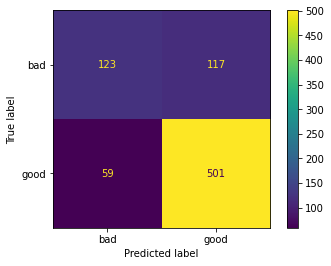

              precision    recall  f1-score   support

         bad       0.68      0.51      0.58       240
        good       0.81      0.89      0.85       560

    accuracy                           0.78       800
   macro avg       0.74      0.70      0.72       800
weighted avg       0.77      0.78      0.77       800


Métricas de avaliação de teste:
[[ 29  31]
 [ 18 122]]


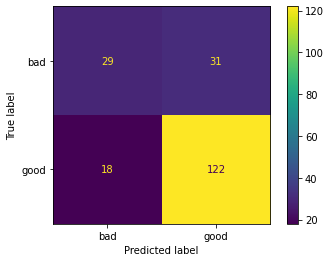

              precision    recall  f1-score   support

         bad       0.62      0.48      0.54        60
        good       0.80      0.87      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



In [26]:
metricas_classificacao(pipe_ab)

Vamos deixar o base_estimator explícito

In [27]:
from sklearn.tree import DecisionTreeClassifier


Métricas de avaliação de treino:
[[123 117]
 [ 59 501]]


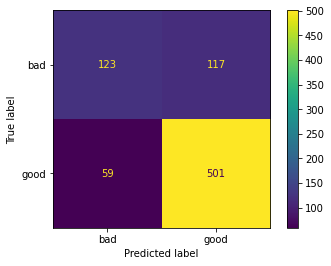

              precision    recall  f1-score   support

         bad       0.68      0.51      0.58       240
        good       0.81      0.89      0.85       560

    accuracy                           0.78       800
   macro avg       0.74      0.70      0.72       800
weighted avg       0.77      0.78      0.77       800


Métricas de avaliação de teste:
[[ 29  31]
 [ 18 122]]


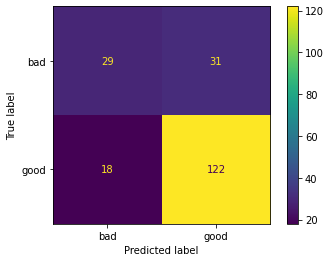

              precision    recall  f1-score   support

         bad       0.62      0.48      0.54        60
        good       0.80      0.87      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



In [33]:
pre_processador = pipe_pre_process_german()

basal = DecisionTreeClassifier(max_depth=1)

# pipeline final
pipe_ab = Pipeline([("pre_processador", pre_processador),
                    ("ab", AdaBoostClassifier(base_estimator=basal,
                                              random_state=42))])


pipe_ab.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_ab)

Podemos, também, mudar o estimador basal. Por exemplo, uma regressão logística fortemente regularizada.

In [34]:
from sklearn.linear_model import LogisticRegression


Métricas de avaliação de treino:
[[ 32 208]
 [ 14 546]]


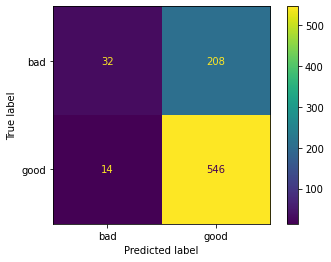

              precision    recall  f1-score   support

         bad       0.70      0.13      0.22       240
        good       0.72      0.97      0.83       560

    accuracy                           0.72       800
   macro avg       0.71      0.55      0.53       800
weighted avg       0.72      0.72      0.65       800


Métricas de avaliação de teste:
[[  9  51]
 [  3 137]]


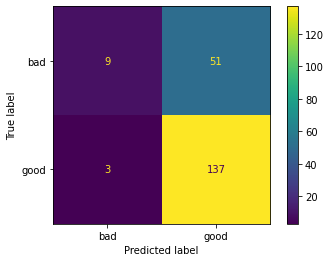

              precision    recall  f1-score   support

         bad       0.75      0.15      0.25        60
        good       0.73      0.98      0.84       140

    accuracy                           0.73       200
   macro avg       0.74      0.56      0.54       200
weighted avg       0.74      0.73      0.66       200



In [37]:
pre_processador = pipe_pre_process_german()

basal = LogisticRegression(C=0.1, random_state=42)

# pipeline final
pipe_ab = Pipeline([("pre_processador", pre_processador),
                    ("ab", AdaBoostClassifier(base_estimator=basal,
                                              random_state=42))])


pipe_ab.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_ab)

Não ficou muito legal. Por isso que, apesar de ser possível usar outros estimadores basais, é comum usarmos stumps mesmo (árvores com uma única quebra).

Vamos agora fazer o gridsearch!

In [39]:
pre_processador = pipe_pre_process_german()

basal = LogisticRegression(l1_ratio = 0.5, random_state=42)

# pipeline final
pipe_ab = Pipeline([("pre_processador", pre_processador),
                    ("ab", AdaBoostClassifier(base_estimator=basal,
                                              random_state=42))])

# =====================================

params_grid_ab = {"ab__base_estimator__C" : [0.1, 0.01],
                  "ab__base_estimator__penalty" : ["l1", "l2", "elasticnet"],
                  "ab__n_estimators" : [50, 100, 150]} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_ab = GridSearchCV(estimator=pipe_ab,
                       param_grid=params_grid_ab,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

grid_ab.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                             

In [40]:
grid_ab.best_estimator_

Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                        

In [41]:
grid_ab.best_params_

{'ab__base_estimator__C': 0.1,
 'ab__base_estimator__penalty': 'l2',
 'ab__n_estimators': 150}


Métricas de avaliação de treino:
[[ 73 167]
 [ 47 513]]


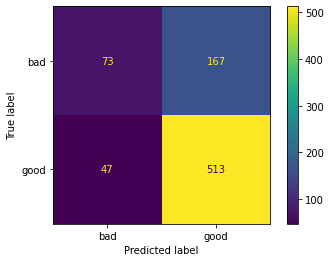

              precision    recall  f1-score   support

         bad       0.61      0.30      0.41       240
        good       0.75      0.92      0.83       560

    accuracy                           0.73       800
   macro avg       0.68      0.61      0.62       800
weighted avg       0.71      0.73      0.70       800


Métricas de avaliação de teste:
[[ 22  38]
 [ 13 127]]


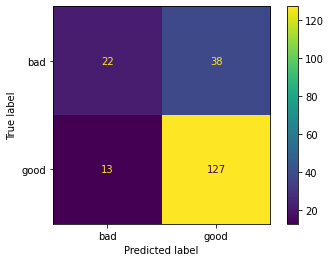

              precision    recall  f1-score   support

         bad       0.63      0.37      0.46        60
        good       0.77      0.91      0.83       140

    accuracy                           0.74       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.74      0.72       200



In [42]:
metricas_classificacao(grid_ab)

In [15]:
# pra casa: continuar explorando o grid/random search!

______

### Bagging vs Boosting

Pra lembrar as principais diferenças entre os dois métodos de ensemble que estudamos:

<img src=https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg width=600>

_________
_______
_________

## 4) Gradient boosting

Além dos métodos que estudamos, há ainda outras classes de métodos de ensemble!

Em particular, a classe de modelos que se utilizam do procedimento de **gradient boosting**.

O gradient boosting também é baseado no princípio de boosting (utilização de weak learners sequencialmente adicionados de modo a **sequencialmente minimizar os erros cometidos**).

<img src=https://miro.medium.com/max/788/1*pEu2LNmxf9ttXHIALPcEBw.png width=600>

Mas este método implementa o boosting através de um **gradiente** explícito.

A ideia é que caminhemos na direção do **erro mínimo** de maneira iterativa **passo a passo**.

Este caminho se dá justamente pelo **gradiente** da **função de custo/perda**, que mede justamente os erros cometidos.

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif width=400>

Este método é conhecido como:

### Gradiente descendente

Deixei em ênfase porque este será um método de **enorme importância** no estudo de redes neurais (e é, em geral, um método de otimização muito utilizado).

O objetivo geral do método é bem simples: determinar quais são os **parâmetros** da hipótese que minimizam a função de custo/perda. Para isso, o método "percorre" a função de erro, indo em direção ao seu mínimo (e este "caminho" feito na função se dá justamente pela **determinação iterativa dos parâmetros**, isto é, **a cada passo, chegamos mais perto dos parâmetros finais da hipótese**, conforme eles são ajustados aos dados.

> **Pequeno interlúdio matemático:** o gradiente descendente implementado pelo gradient boosting é, na verdade, um **gradiente descendente funcional**, isto é, desejamos encontrar não um conjunto de parâmetros que minimiza o erro, mas sim **introduzir sequencialmente weak learners (hipótese simples) que minimizam o erro**. Desta forma, o gradient boosting minimiza a função de custo ao ecolher iterativamente hipóteses simples que apontam na direção do mínimo, neste espaço funcional.

Apesar do interlúdio acima, não precisamos nos preocupar muito com os detalhes matemáticos: o que importa é entender que no caso do gradient boosting, há alguns pontos importantes:

- Uma **função de custo/perda (loss)** é explicitamente minimizada por um procedimento de gradiente;

- O gradiente está relacionado com o procedimento de **encadeamento progressivo entre weak learners**, seguindo a ideia do boosting.

Pra quem quiser saber um pouco mais de detalhes (e se aventurar na matemática), sugiro [este post](https://www.gormanalysis.com/blog/gradient-boosting-explained/) ou então [este site](https://explained.ai/gradient-boosting/), que contém vários materiais ótimos para entender o método com todos os detalhes matemáticos.

Os [vídeos do StatQuest](https://www.youtube.com/playlist?list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6) também são uma boa referência!

As classes do sklearn são:

- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

E os principais hiperparâmetros a serem ajustados são:

- `n_estimators` : novamente, o número de weak learners encadeados.

- `learning_rate` : a constante que multiplica o gradiente no gradiente descendente. Essencialmente, controla o "tamanho do passo" a ser dado em direção ao mínimo.

Segundo o próprio [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting): "*Empirical evidence suggests that small values of `learning_rate` favor better test error. The lireature recommends to set the learning rate to a small constant (e.g. `learning_rate <= 0.1`) and choose `n_estimators` by early stopping.*"

Ainda sobre a learning rate, as ilustrações a seguir ajudam a entender sua importância:

<img src=https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png width=700>

<img src=https://cdn-images-1.medium.com/max/1440/0*A351v9EkS6Ps2zIg.gif width=500>

Vamos treinar nosso classificador baseline de gradient boosting:

In [44]:
from sklearn.ensemble import GradientBoostingClassifier


Métricas de avaliação de treino:
[[161  79]
 [ 13 547]]


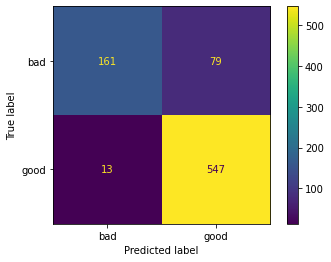

              precision    recall  f1-score   support

         bad       0.93      0.67      0.78       240
        good       0.87      0.98      0.92       560

    accuracy                           0.89       800
   macro avg       0.90      0.82      0.85       800
weighted avg       0.89      0.89      0.88       800


Métricas de avaliação de teste:
[[ 28  32]
 [ 13 127]]


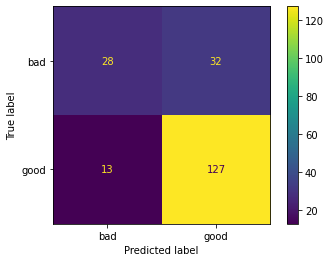

              precision    recall  f1-score   support

         bad       0.68      0.47      0.55        60
        good       0.80      0.91      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.69      0.70       200
weighted avg       0.76      0.78      0.76       200



In [45]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_gb = Pipeline([("pre_processador", pre_processador),
                    ("gb", GradientBoostingClassifier(random_state=42))])


pipe_gb.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_gb)


Métricas de avaliação de treino:
[[ 71 169]
 [ 27 533]]


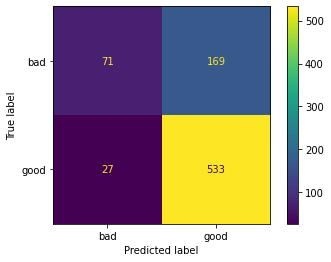

              precision    recall  f1-score   support

         bad       0.72      0.30      0.42       240
        good       0.76      0.95      0.84       560

    accuracy                           0.76       800
   macro avg       0.74      0.62      0.63       800
weighted avg       0.75      0.76      0.72       800


Métricas de avaliação de teste:
[[ 17  43]
 [  7 133]]


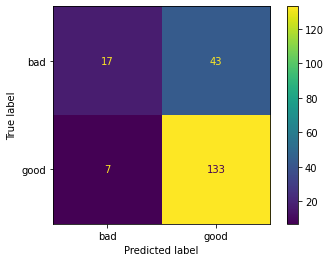

              precision    recall  f1-score   support

         bad       0.71      0.28      0.40        60
        good       0.76      0.95      0.84       140

    accuracy                           0.75       200
   macro avg       0.73      0.62      0.62       200
weighted avg       0.74      0.75      0.71       200



In [46]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_gb = Pipeline([("pre_processador", pre_processador),
                    ("gb", GradientBoostingClassifier(max_depth=1,
                                                      random_state=42))])


pipe_gb.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_gb)

Pra casa: grid search para otimizar os hiperparâmetros!

In [13]:
# grid search (siga a dica do sklearn!)

_________
_______
_________

## 5) XGBoost

Chegamos ao nosso último método de ensemble, o XGBoost (e**X**treme **G**radient **Boost**ing).

Este método nada mais é que um gradient boosting, mas com algumas importantes modificações que lhe conferem o título de "extreme"! Em particular, duas alterações merecem destaque:

- A adição de procedimentos de regularização (L1 e L2!), o que melhora consideravelmente sua capacidade de generalização;

- A utilização de derivadas de segunda ordem (Hessiano) para o procedimento de gradiente.

Para quem quiser se aventurar mais, sugiro algumas boas leituras:

- [Este](https://shirinsplayground.netlify.app/2018/11/ml_basics_gbm/), explica bem as particularidades do XGBoost, além de dar uma boa introdução ao gradient boosting (o código é em R, então pode ignorar essa parte hehe);

- [Este](https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb), introduz bem o método, enquanto enfativa suas particularidades, com alguns detalhes matemáticos;

- [Este](https://xgboost.readthedocs.io/en/latest/tutorials/model.html), da própria documentação da biblioteca, traz uma explicação legal, e com alguns detalhes matemáticos;

- [Este](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d), com uma discussão mais alto-nível (sem tantos detalhes) sobre o XGBoost e os motivos de seu sucesso.

Infelizmente, o sklearn não tem o XGBoost implementado :(

Mas, felizmente, existe uma biblioteca que o implementou, de maneira totalmente integrada ao sklearn!!

A biblioteca é a [XGBoost](https://xgboost.readthedocs.io/en/latest/).

Para instalar a biblioteca, o de sempre:

`!pip install xgboost`

In [47]:
from xgboost import XGBClassifier


Métricas de avaliação de treino:
[[239   1]
 [  0 560]]


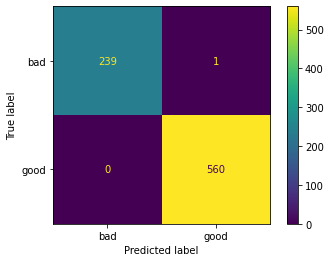

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       240
        good       1.00      1.00      1.00       560

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Métricas de avaliação de teste:
[[ 30  30]
 [ 23 117]]


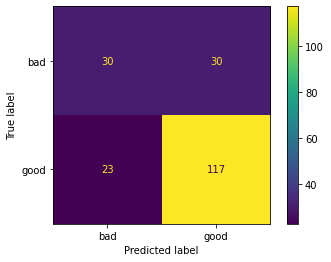

              precision    recall  f1-score   support

         bad       0.57      0.50      0.53        60
        good       0.80      0.84      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.73      0.73       200



In [51]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_xgb = Pipeline([("pre_processador", pre_processador),
                     ("xgb", XGBClassifier(eval_metric='logloss', random_state=42))])


pipe_xgb.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_xgb)

Aumentando um pouco a regularização:


Métricas de avaliação de treino:
[[105 135]
 [ 30 530]]


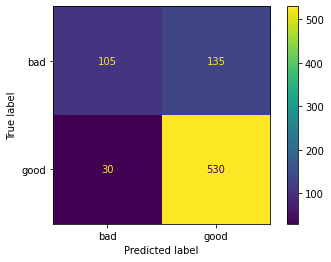

              precision    recall  f1-score   support

         bad       0.78      0.44      0.56       240
        good       0.80      0.95      0.87       560

    accuracy                           0.79       800
   macro avg       0.79      0.69      0.71       800
weighted avg       0.79      0.79      0.77       800


Métricas de avaliação de teste:
[[ 28  32]
 [ 11 129]]


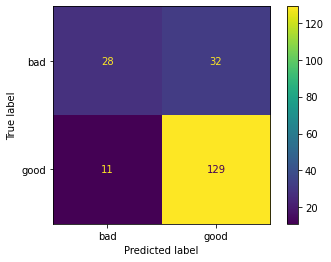

              precision    recall  f1-score   support

         bad       0.72      0.47      0.57        60
        good       0.80      0.92      0.86       140

    accuracy                           0.79       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200



In [55]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_xgb = Pipeline([("pre_processador", pre_processador),
                     ("xgb", XGBClassifier(reg_alpha=10, eval_metric='logloss', random_state=42))])


pipe_xgb.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_xgb)

Pra casa: gridsearch completo!

In [ ]:
# gridsearch do xgboost